# Analise do Bitcoin no período pré e pós o HALVING 

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt 
import mplfinance as fplt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# dados

inicio = '2011-12-09'
fim = '2023-05-20'
nome = 'BTC-USD'

In [4]:
# data dos ultimos halvings do Bitcoin 
# 28 de novembro de 2012 & 9 de julho de 2016 & 11 de maio de 2020 & vai ser em 2024

# POR FALTA DE DADOS NÃO SERÁ ANALISADO O HALVING DE 2012
hal=['2016-09-07','2020-11-05'] 


In [5]:
df = yf.download(nome, inicio, fim)

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
# limpando os dados 

df1 = df.dropna(axis=0)

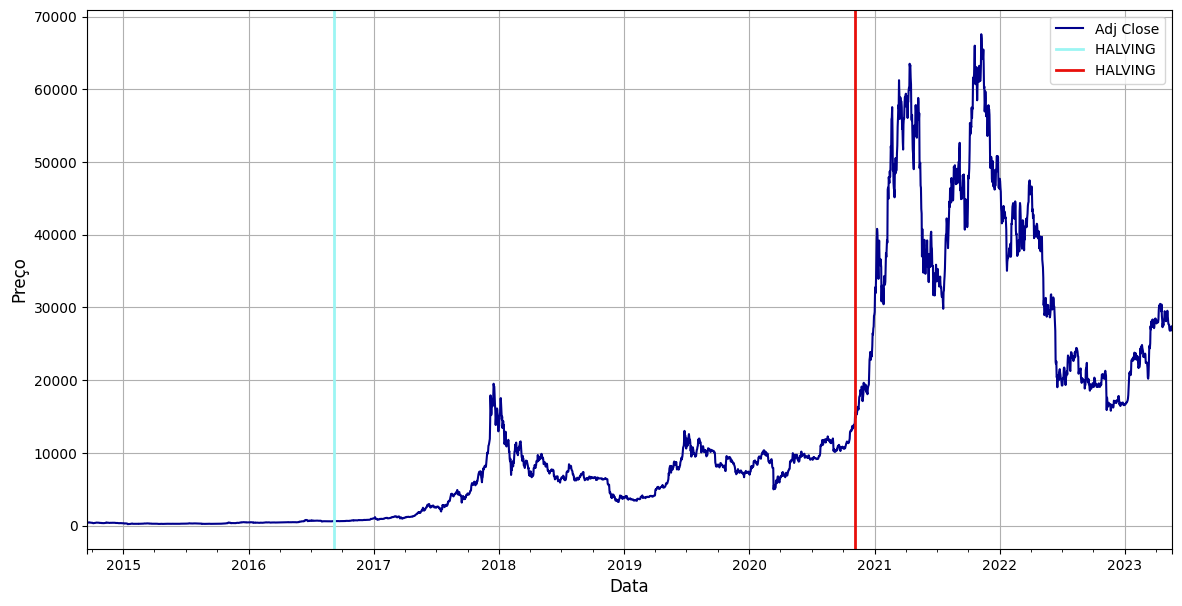

In [8]:

# Primeiro gráfico 

df['Adj Close'].plot(grid = True
                                       , figsize = (14,7), linewidth = 1.5,
                                       fontsize = 10, color = 'darkblue')



for i in range(2):
    plt.axvline(x = hal[i], color = np.random.rand(3, ) , label = 'HALVING ' ,  linewidth = 2 ) # Plotting a vertical line

plt.xlabel('Data'
          , fontsize = 12);
plt.ylabel('Preço'
          , fontsize = 12);
plt.legend();

In [9]:
# pegando 1 anos antes e depois de cada HALVING

#df_h1 = df1.loc['2011-28-11':'2013-28-11'] por falta de dados não irei fazer a do primerio halving
df_h2 = df1.loc['2015-09-07':'2017-09-07']
df_h3 = df1.loc['2019-11-05':'2021-11-05']

# Pré HALVING
df_h2_pre = df1.loc['2015-09-07':'2016-09-07']
df_h3_pre = df1.loc['2019-11-05':'2020-11-05']

# Pós HALVING
df_h2_pos = df1.loc['2016-09-07':'2017-09-07']
df_h3_pos = df1.loc['2020-11-05':'2021-11-05']


In [10]:
# calculando o retornos dos periodos
periodo = 1

df['Retornos'] = df['Adj Close'].pct_change(periodo).cumsum()
df_h2['Retornos'] = df_h2['Adj Close'].pct_change(periodo).cumsum()
df_h3['Retornos'] = df_h3['Adj Close'].pct_change(periodo).cumsum()

# Pré HALVING
df_h2_pre['Retornos'] = df_h2['Adj Close'].pct_change(periodo).cumsum()
df_h3_pre['Retornos'] = df_h3['Adj Close'].pct_change(periodo).cumsum()

#Pós HALVING
df_h2_pos['Retornos'] = df_h2['Adj Close'].pct_change(periodo).cumsum()
df_h3_pos['Retornos'] = df_h3['Adj Close'].pct_change(periodo).cumsum()

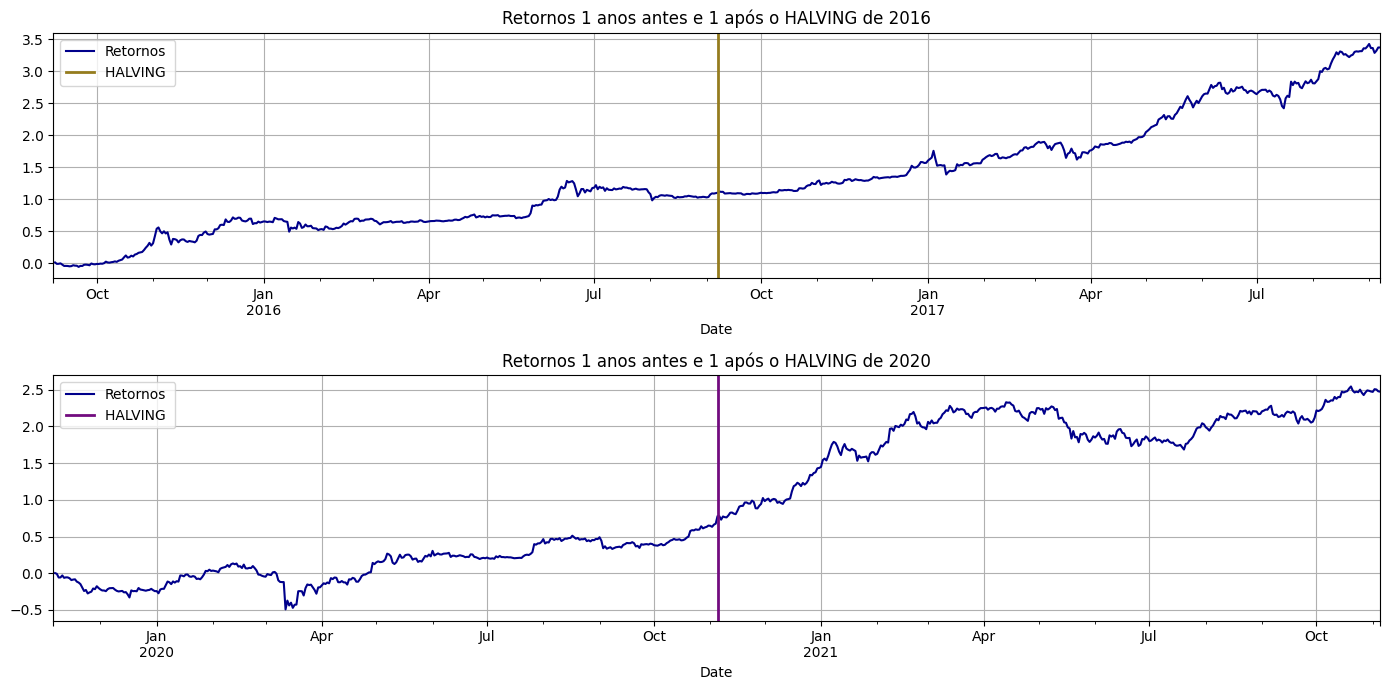

In [11]:
# Plotando 1 anos ante e uma anos depois dos HALVINGS

plt.figure(figsize=(6, 4))
plt.subplot(2, 1, 1)
df_h2['Retornos'].plot(grid = True
                        ,title='Retornos 1 anos antes e 1 após o HALVING de 2016', figsize = (14,7), linewidth = 1.5,
                        fontsize = 10, color = 'darkblue')
plt.axvline(x = hal[0], color = np.random.rand(3, ) , label = 'HALVING ' ,  linewidth = 2 ) # Plotting a vertical line
plt.legend()


plt.subplot(2, 1, 2)
df_h3['Retornos'].plot(grid = True
                        ,title='Retornos 1 anos antes e 1 após o HALVING de 2020', figsize = (14,7), linewidth = 1.5,
                                       fontsize = 10, color = 'darkblue')
plt.axvline(x = hal[1], color = np.random.rand(3, ) , label = 'HALVING ' ,  linewidth = 2 ) # Plotting a vertical line
plt.legend()

plt.tight_layout()

plt.show()

# Retornos Pré e Pós HALVING

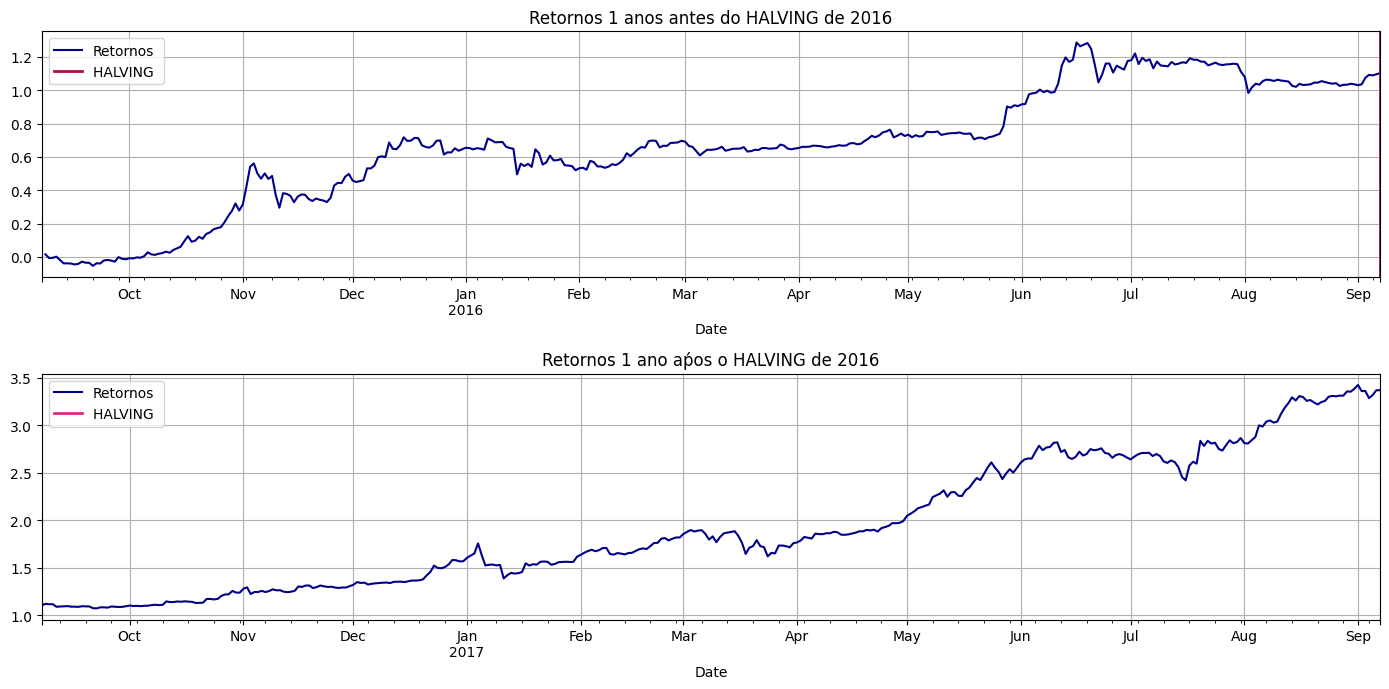

In [17]:
# Retornos HALVING 2016 

# Plotando 1 anos antes dos HALVINGS

plt.figure(figsize=(6, 4))

plt.subplot(2, 1, 1)
df_h2_pre['Retornos'].plot(grid = True
                            ,title='Retornos 1 anos antes do HALVING de 2016', figsize = (14,7), linewidth = 1.5
                            ,fontsize = 10, color = 'darkblue')
plt.axvline(x = hal[0], color = np.random.rand(3, ) , label = 'HALVING ' ,  linewidth = 2 ) # Plotting a vertical line
plt.legend()

# RETORNO PÓS HALVING 
plt.subplot(2, 1, 2)
df_h2_pos['Retornos'].plot(grid = True
                        ,title='Retornos 1 ano aṕos o HALVING de 2016', figsize = (14,7), linewidth = 1.5
                        ,fontsize = 10, color = 'darkblue')
plt.axvline(x = hal[1], color = np.random.rand(3, ) , label = 'HALVING ' ,  linewidth = 2 ) # Plotting a vertical line
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# retorno HALVING 2016 
print('Valor do retorno 1 ano antes do Halving de 2016: \n'+ str(df_h2_pre['Retornos'].tail(1)))
print('\n\nValor do retorno 1 ano após o Halving de 2016: \n'+str(df_h2_pos['Retornos'].tail(1)))

Valor do retorno 1 ano antes do Halving de 2016: 
Date
2016-09-07    1.102466
Name: Retornos, dtype: float64


Valor do retorno 1 ano após o Halving de 2016: 
Date
2017-09-07    3.367896
Name: Retornos, dtype: float64


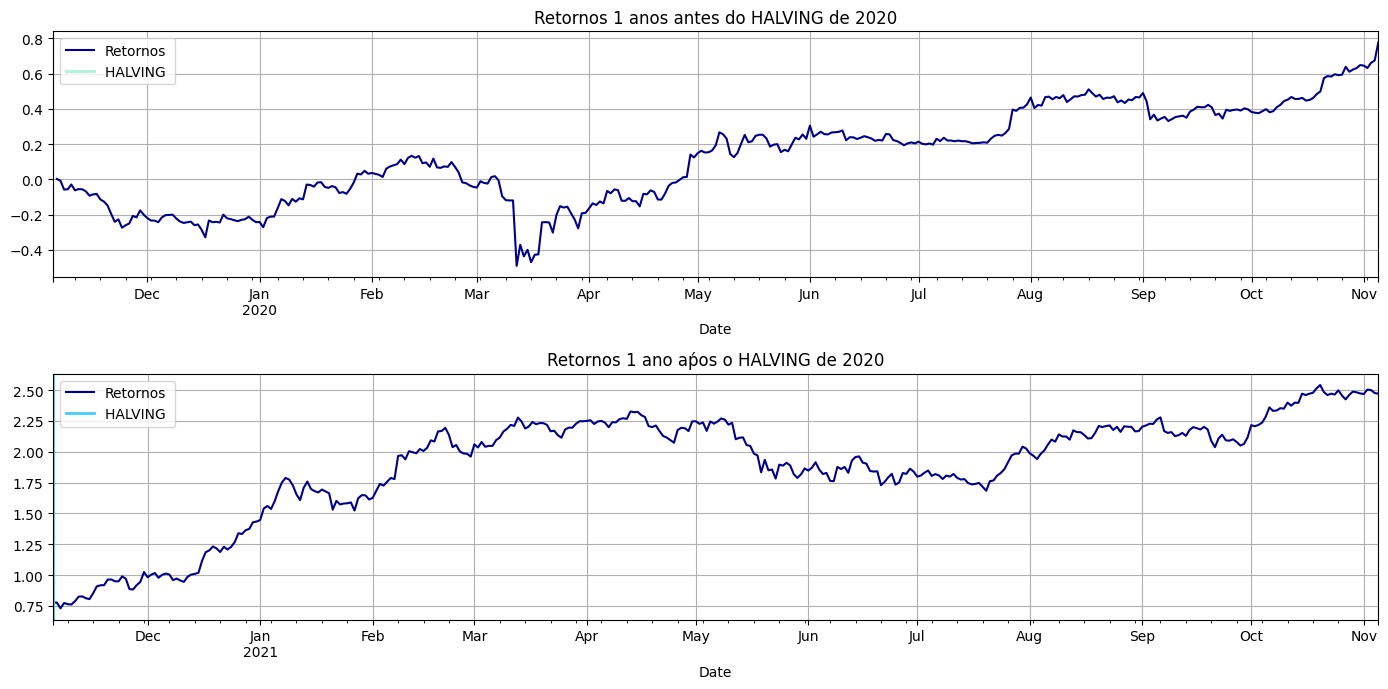

In [20]:
# Retornos HALVING 2020

# Plotando 1 anos antes dos HALVINGS

plt.figure(figsize=(6, 4))

plt.subplot(2, 1, 1)
df_h3_pre['Retornos'].plot(grid = True
                            ,title='Retornos 1 anos antes do HALVING de 2020', figsize = (14,7), linewidth = 1.5
                            ,fontsize = 10, color = 'darkblue')
plt.axvline(x = hal[0], color = np.random.rand(3, ) , label = 'HALVING ' ,  linewidth = 2 ) # Plotting a vertical line
plt.legend()

# RETORNO PÓS HALVING 
plt.subplot(2, 1, 2)
df_h3_pos['Retornos'].plot(grid = True
                        ,title='Retornos 1 ano aṕos o HALVING de 2020', figsize = (14,7), linewidth = 1.5
                        ,fontsize = 10, color = 'darkblue')
plt.axvline(x = hal[1], color = np.random.rand(3, ) , label = 'HALVING ' ,  linewidth = 2 ) # Plotting a vertical line
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# retorno HALVING 2020
print('Valor do retorno 1 ano antes do Halving de 2020: \n'+ str(df_h3_pre['Retornos'].tail(1)))
print('\n\nValor do retorno 1 ano após o Halving de 2020: \n'+str(df_h3_pos['Retornos'].tail(1)))

Valor do retorno 1 ano antes do Halving de 2020: 
Date
2020-11-05    0.777217
Name: Retornos, dtype: float64


Valor do retorno 1 ano após o Halving de 2020: 
Date
2021-11-05    2.471633
Name: Retornos, dtype: float64
